In [140]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

import helper_functions.displayFunctions as display

In [141]:
participant_boxes_total = pd.read_csv('data/experiment_boxes.csv')
nesting_pairs_total = pd.read_csv('data_out/nesting/nesting_pairs.csv')
participant_data_total = pd.read_csv('data_out/nesting/participant_nesting_data.csv')
image_nesting_stats_total = pd.read_csv('data_out/nesting/image_nesting_stats.csv')

In [142]:
nat_files = [f for f in os.listdir('images/images_nat') if os.path.isfile(os.path.join('images/images_nat', f))]
art_files = [f for f in os.listdir('images/images_art') if os.path.isfile(os.path.join('images/images_art', f))]

participant_boxes_nat = participant_boxes_total[participant_boxes_total['file_name'].isin(nat_files)]
nesting_pairs_nat = nesting_pairs_total[nesting_pairs_total['Image'].isin(nat_files)]
participant_data_nat = participant_data_total[participant_data_total['Image'].isin(nat_files)]
image_nesting_stats_nat = image_nesting_stats_total[image_nesting_stats_total['Image'].isin(nat_files)]

participant_boxes_art = participant_boxes_total[participant_boxes_total['file_name'].isin(art_files)]
nesting_pairs_art = nesting_pairs_total[nesting_pairs_total['Image'].isin(art_files)]
participant_data_art = participant_data_total[participant_data_total['Image'].isin(art_files)]
image_nesting_stats_art = image_nesting_stats_total[image_nesting_stats_total['Image'].isin(art_files)]

# Natural
participant_boxes = participant_boxes_nat
nesting_pairs = nesting_pairs_nat
participant_data = participant_data_nat
image_nesting_stats = image_nesting_stats_nat

# Total
# participant_boxes = participant_boxes_total
# nesting_pairs = nesting_pairs_total
# participant_data = participant_data_total
# image_nesting_stats = image_nesting_stats_total

# What percentage of nesting?

In [143]:
unique_parents = np.unique(nesting_pairs['Parent'].astype(int))
unique_childs = np.unique(nesting_pairs['Child'].astype(int))
intersection = np.intersect1d(unique_parents, unique_childs)
union = np.union1d(unique_parents, unique_childs)

nest_percentage = (len(union) / len(participant_boxes)) * 100

print(f'Out of the {len(participant_boxes)} unique boxes, {len(union)} ({nest_percentage:.2f}%) belonged to a nested symmetry structure.')

Out of the 17062 unique boxes, 1579 (9.25%) belonged to a nested symmetry structure.


In [144]:
print(f'Total boxes {len(participant_boxes)}')

participant_boxes
new_df = participant_boxes[['id', 'file_name']]
new_df = new_df.drop_duplicates()

average_occurrences = new_df['file_name'].value_counts().mean()

print(np.unique(new_df['file_name'].value_counts(), return_counts=True))

print(f'On average, each file_name appears {average_occurrences:.2f} times.')

print(f'boxes per image: {len(participant_boxes) / len(np.unique(participant_boxes["file_name"]))}')

Total boxes 17062
(array([47, 48, 49, 50, 51, 52], dtype=int64), array([ 5, 12, 56, 70, 44, 13], dtype=int64))
On average, each file_name appears 49.88 times.
boxes per image: 85.31


## Personal Trends

### Total

In [145]:
# Group by Participant_id and aggregate the data
grouped_data = participant_data.groupby('Participant_id').agg({
    'Num_boxes': 'sum',
    'Num_nestings': 'sum',
    'Num_nestings_pc': 'sum',
    'Num_nestings_cp': 'sum'
}).reset_index()

nesting_participants = grouped_data[grouped_data['Num_nestings'] != 0]
nesting_images = participant_data[participant_data['Num_nestings'] != 0]

print(f'Out of the {len(grouped_data)} participants, {len(nesting_participants)} ({(len(nesting_participants) / len(grouped_data) * 100):.2f}%) created at least one nesting structure. On average participants created {grouped_data["Num_nestings"].mean():.2f} nesting structures.')

Out of the 399 participants, 215 (53.88%) created at least one nesting structure. On average participants created 2.46 nesting structures.


### Graphing personal trends

#### Per experiment

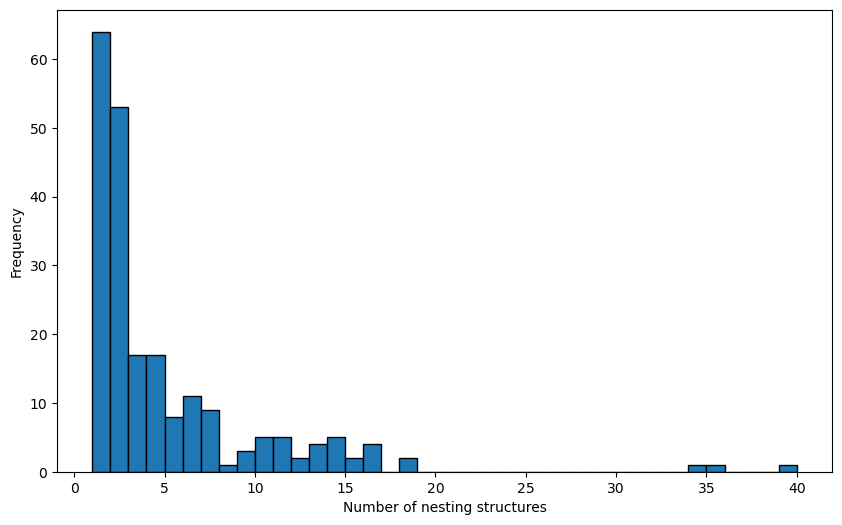

In [178]:
plt.figure(figsize=(10, 6))
plt.hist(nesting_participants['Num_nestings'], bins=range(1, nesting_participants['Num_nestings'].max() + 2), edgecolor='black')
# plt.title('Frequency of nesting structures created by participants during the experiment')
plt.xlabel('Number of nesting structures')
plt.ylabel('Frequency')
# plt.yscale('log')
plt.show()

#### Per Image

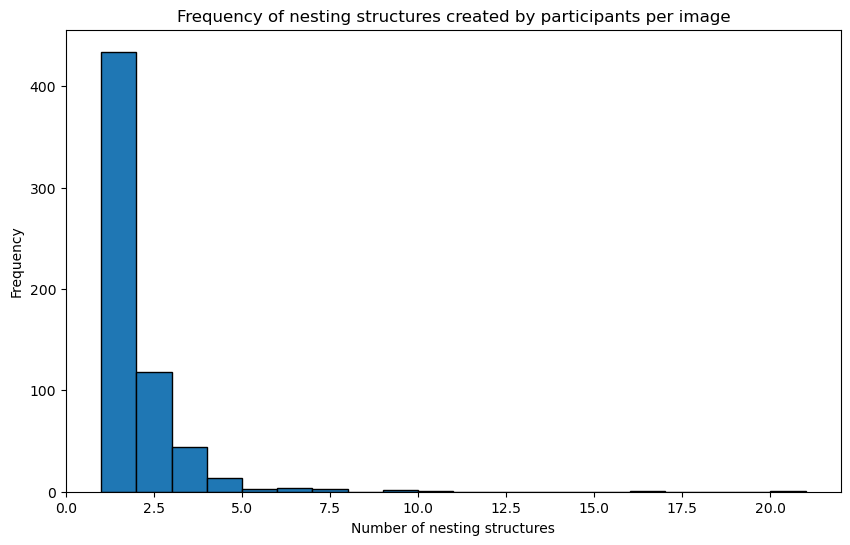

In [147]:
plt.figure(figsize=(10, 6))
plt.hist(nesting_images['Num_nestings'], bins=range(1, nesting_images['Num_nestings'].max() + 2), edgecolor='black')
plt.title('Frequency of nesting structures created by participants per image')
plt.xlabel('Number of nesting structures')
plt.ylabel('Frequency')
plt.show()

# Trends parent - child

## Number of child/parent/both

In [148]:
parent_num = len(unique_parents) - len(intersection)
child_num = len(unique_childs) - len(intersection)
intersection_num = len(intersection)

parent_percentage = (parent_num / len(union)) * 100
child_percentage = (child_num / len(union)) * 100
intersection_percentage = (intersection_num / len(union)) * 100

print(f'There is a total of {len(union)} boxes that belong to the nesting pairs. {parent_num} ({parent_percentage:.2f}%) are parents, {child_num} ({child_percentage:.2f}%) are children and {intersection_num} ({intersection_percentage:.2f}%) are middle nesting areas.')

There is a total of 1579 boxes that belong to the nesting pairs. 670 (42.43%) are parents, 867 (54.91%) are children and 42 (2.66%) are middle nesting areas.


## Number of childs per parent

In [149]:
unique_child_per_parent = nesting_pairs.groupby('Parent')['Child'].nunique().reset_index()
unique_child_per_parent.columns = ['Parent', 'Unique_Child_Count']

print(f'On average, each parent box has {unique_child_per_parent["Unique_Child_Count"].mean():.2f} unique child boxes with a standard deviation of {unique_child_per_parent["Unique_Child_Count"].std():.2f}.')

On average, each parent box has 1.38 unique child boxes with a standard deviation of 0.92.


## p-c / c-p

In [150]:
print(f'Out of all nesting structures created by participants, {nesting_participants.sum()["Num_nestings_pc"] / nesting_participants.sum()["Num_nestings"] * 100:.2f}% were parent-child nestings and {nesting_participants.sum()["Num_nestings_cp"] / nesting_participants.sum()["Num_nestings"] * 100:.2f}% were child-parent nestings.')

Out of all nesting structures created by participants, 63.75% were parent-child nestings and 36.25% were child-parent nestings.


## Personal trends

In [151]:
nesting_participants.std()

print(f'On average each participant created {nesting_participants.mean()["Num_nestings_pc"]:.2f} parent-child nestings (standard deviation {nesting_participants.std()["Num_nestings_pc"]:.2f}) and {nesting_participants.mean()["Num_nestings_cp"]:.2f} child-parent nestings (standard deviation {nesting_participants.std()["Num_nestings_cp"]:.2f}).')

On average each participant created 2.91 parent-child nestings (standard deviation 3.98) and 1.66 child-parent nestings (standard deviation 2.33).


### Graphs

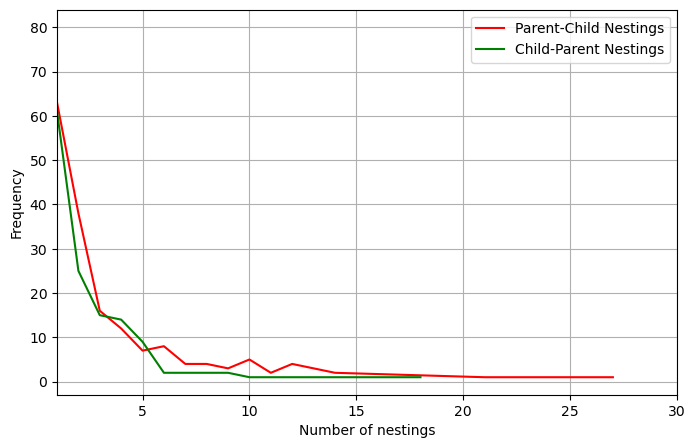

In [179]:
Num_nestings_pc_counts = nesting_participants['Num_nestings_pc'].value_counts().sort_index()
Num_nestings_cp_counts = nesting_participants['Num_nestings_cp'].value_counts().sort_index()

# Plot the frequency with a line graph
plt.figure(figsize=(8, 5))
plt.plot(Num_nestings_pc_counts.index, Num_nestings_pc_counts.values, linestyle='-', color='r', label='Parent-Child Nestings')
plt.plot(Num_nestings_cp_counts.index, Num_nestings_cp_counts.values, linestyle='-', color='g', label='Child-Parent Nestings')
# plt.title('Frequency child-parent and parent-child nestings created by participants')
plt.xlabel('Number of nestings')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(1, 30)
plt.grid(True)
plt.show()

# Trends in size

## How many second boxes? (or higher)

In [153]:
size_trends_total = pd.read_csv('data_out/nesting/size_trends.csv')
size_trends_nat = size_trends_total[size_trends_total['file_name'].isin(nat_files)]
size_trends_art = size_trends_total[size_trends_total['file_name'].isin(art_files)]

size_trends = size_trends_nat

In [154]:
nonzero_size_trend = size_trends[(size_trends['Increasing_sizes'] != 0) | (size_trends['Decreasing_sizes'] != 0)]

second_or_higher = nonzero_size_trend.sum()['Increasing_sizes']+nonzero_size_trend.sum()['Decreasing_sizes']

print(f'Out of the {len(participant_boxes)} recorded unique boxes, {second_or_higher} ({(second_or_higher / len(participant_boxes) * 100):.2f}%) were the second or higher box indicated in the same image by a participant.')

Out of the 17062 recorded unique boxes, 5604 (32.84%) were the second or higher box indicated in the same image by a participant.


## How many increasing/decreasing?

In [155]:
size_trends_sums = size_trends.sum()

print(f'Out of all the second or higher images indicated by participants, {size_trends_sums["Increasing_sizes"]} ({size_trends_sums["Increasing_sizes"] / second_or_higher * 100:.2f}%) had an increasing size trend and {size_trends_sums["Decreasing_sizes"]} ({size_trends_sums["Decreasing_sizes"] / second_or_higher * 100:.2f}%) had a decreasing size trend.')

Out of all the second or higher images indicated by participants, 2130 (38.01%) had an increasing size trend and 3474 (61.99%) had a decreasing size trend.


## How many images only had increasing or decreasing

In [156]:
increasing_only = nonzero_size_trend[nonzero_size_trend['Decreasing_sizes'] == 0]
decreasing_only = nonzero_size_trend[nonzero_size_trend['Increasing_sizes'] == 0]
increasing_and_decreasing = nonzero_size_trend[(nonzero_size_trend['Increasing_sizes'] != 0) & (nonzero_size_trend['Decreasing_sizes'] != 0)]

print(f'Out of all the instances of images labeled with 2 or more boxes, {len(increasing_only)} ({(len(increasing_only) / len(nonzero_size_trend) * 100):.2f}%) had only an increasing size trend, {len(decreasing_only)} ({(len(decreasing_only) / len(nonzero_size_trend) * 100):.2f}%) had only a decreasing size trend and {len(increasing_and_decreasing)} ({(len(increasing_and_decreasing) / len(nonzero_size_trend) * 100):.2f}%) had both.')

Out of all the instances of images labeled with 2 or more boxes, 927 (26.16%) had only an increasing size trend, 1791 (50.54%) had only a decreasing size trend and 826 (23.31%) had both.


## Individual Trends

In [157]:
# Calculating when people do increasing only or decreasing only

counts_df = nonzero_size_trend.groupby('id').apply(
    lambda x: pd.Series({
        'increasing_only': (x['Decreasing_sizes'] == 0).sum(),
        'decreasing_only': (x['Increasing_sizes'] == 0).sum(),
        'increasing_and_decreasing': ((x['Decreasing_sizes'] != 0) & (x['Increasing_sizes'] != 0)).sum()
    })
).reset_index()

# Calculate the sum of increasing_only, decreasing_only, and increasing_and_decreasing for each row
counts_df['total'] = counts_df[['increasing_only', 'decreasing_only', 'increasing_and_decreasing']].sum(axis=1)

# Divide each column by the total
counts_df['increasing_only_ratio'] = counts_df['increasing_only'] / counts_df['total']
counts_df['decreasing_only_ratio'] = counts_df['decreasing_only'] / counts_df['total']
counts_df['increasing_and_decreasing_ratio'] = counts_df['increasing_and_decreasing'] / counts_df['total']

# Drop the total column as it's no longer needed
counts_df.drop(columns=['total'], inplace=True)

counts_df

,id,increasing_only,decreasing_only,increasing_and_decreasing,increasing_only_ratio,decreasing_only_ratio,increasing_and_decreasing_ratio
0,7,4,6,0,0.400000,0.600000,0.000000
1,31,4,0,0,1.000000,0.000000,0.000000
2,43,1,6,3,0.100000,0.600000,0.300000
3,46,3,8,3,0.214286,0.571429,0.214286
4,58,3,9,2,0.214286,0.642857,0.142857
...,...,...,...,...,...,...,...
351,3471,9,7,6,0.409091,0.318182,0.272727
352,3474,4,4,0,0.500000,0.500000,0.000000
353,3477,4,8,2,0.285714,0.571429,0.142857
354,3480,6,6,1,0.461538,0.461538,0.076923


### How many people only have one trend?

In [158]:
counts_df

,id,increasing_only,decreasing_only,increasing_and_decreasing,increasing_only_ratio,decreasing_only_ratio,increasing_and_decreasing_ratio
0,7,4,6,0,0.400000,0.600000,0.000000
1,31,4,0,0,1.000000,0.000000,0.000000
2,43,1,6,3,0.100000,0.600000,0.300000
3,46,3,8,3,0.214286,0.571429,0.214286
4,58,3,9,2,0.214286,0.642857,0.142857
...,...,...,...,...,...,...,...
351,3471,9,7,6,0.409091,0.318182,0.272727
352,3474,4,4,0,0.500000,0.500000,0.000000
353,3477,4,8,2,0.285714,0.571429,0.142857
354,3480,6,6,1,0.461538,0.461538,0.076923


In [159]:
num_participants_two_or_more = len(counts_df)

only_increasing_only = len(counts_df[(counts_df['decreasing_only'] == 0) & (counts_df['increasing_and_decreasing'] == 0)])
only_decreasing_only = len(counts_df[(counts_df['increasing_only'] == 0) & (counts_df['increasing_and_decreasing'] == 0)])
only_both = len(counts_df[(counts_df['increasing_only'] == 0) & (counts_df['decreasing_only'] == 0)])

print(f'Out of the {num_participants_two_or_more} participants that labeled 2 or more boxes, {only_increasing_only} ({(only_increasing_only / num_participants_two_or_more * 100):.2f}%) only labeled increasing size trends, {only_decreasing_only} ({(only_decreasing_only / num_participants_two_or_more * 100):.2f}%) only labeled decreasing size trends and {only_both} ({(only_both / num_participants_two_or_more * 100):.2f}%) only labeled both.')


Out of the 356 participants that labeled 2 or more boxes, 22 (6.18%) only labeled increasing size trends, 21 (5.90%) only labeled decreasing size trends and 0 (0.00%) only labeled both.


### What are the percentages of the trends?

In [177]:
counts_df.mean()

print(f'On average, participants labeled {counts_df.mean()["increasing_only_ratio"]*100:.2f}% images with only increasing size trends, {counts_df.mean()["decreasing_only_ratio"]*100:.2f}% with only decreasing size trends and {counts_df.mean()["increasing_and_decreasing_ratio"]*100:.2f}% both.')

On average, participants labeled 31.65% images with only increasing size trends, 51.55% with only decreasing size trends and 16.80% both.


### Table

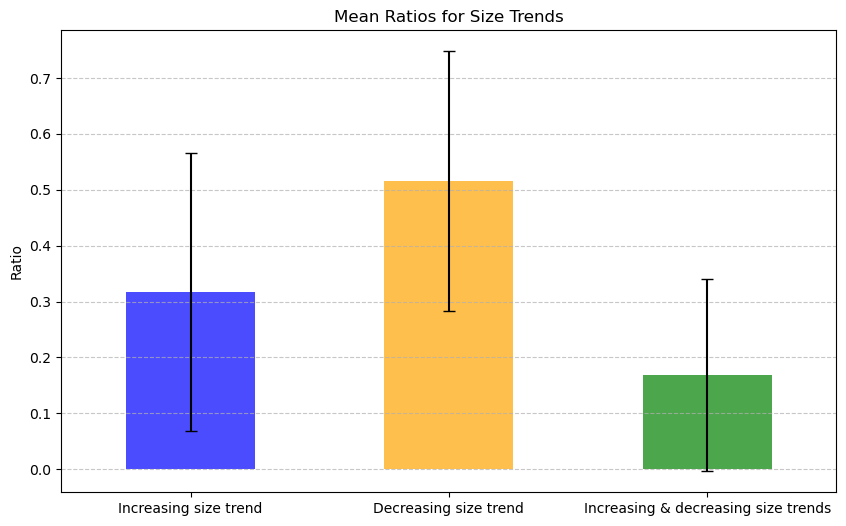

In [161]:
# Calculate the mean and standard deviation for the ratios
mean_ratios = counts_df[['increasing_only_ratio', 'decreasing_only_ratio', 'increasing_and_decreasing_ratio']].mean()
std_ratios = counts_df[['increasing_only_ratio', 'decreasing_only_ratio', 'increasing_and_decreasing_ratio']].std()

# Create a bar plot with error bars
mean_ratios.index = ['Increasing size trend', 'Decreasing size trend', 'Increasing & decreasing size trends']
std_ratios.index = ['Increasing size trend', 'Decreasing size trend', 'Increasing & decreasing size trends']

plt.figure(figsize=(10, 6))
mean_ratios.plot(kind='bar', yerr=std_ratios, capsize=4, color=['blue', 'orange', 'green'], alpha=0.7)
plt.title('Mean Ratios for Size Trends')
plt.ylabel('Ratio')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Nestings by selecting symmetries consecutively?

In [162]:
non_consecutive_count = 0
non_consecutive_ids = []

for _, row in tqdm(nesting_pairs.iterrows(), total=len(nesting_pairs)):
    parent_id = int(row['Parent'])
    child_id = int(row['Child'])

    non_consecutive = False
    # Checking all non consecutives
    if abs(parent_id - child_id) != 1:
        smaller_id = min(parent_id, child_id)
        
        for i in range(1, abs(parent_id - child_id)):
            new_id = smaller_id + i

            if new_id not in union:
                non_consecutive = True
                non_consecutive_ids.append((parent_id, child_id, new_id))

    if non_consecutive:
        non_consecutive_count += 1

print(f'Out of the {len(nesting_pairs)} nesting pairs, {non_consecutive_count} ({(non_consecutive_count / len(nesting_pairs) * 100):.2f}%) had non-consecutive boxes in between the parent and child boxes.')

100%|██████████| 982/982 [00:00<00:00, 29686.80it/s]

Out of the 982 nesting pairs, 119 (12.12%) had non-consecutive boxes in between the parent and child boxes.


# Symmetry Axis overlap

## Rotation

In [163]:
rot_diff_thres = 10

rotation_diff_filtered_0 = nesting_pairs[(nesting_pairs['Rotation_difference'] >= 0) & (nesting_pairs['Rotation_difference'] <= rot_diff_thres)]
rotation_diff_filtered_90 = nesting_pairs[(nesting_pairs['Rotation_difference'] >= 90 - rot_diff_thres) & (nesting_pairs['Rotation_difference'] <= 90 + rot_diff_thres)]

print(f'Out of the {len(nesting_pairs)} nesting pairs, {len(rotation_diff_filtered_0)} ({(len(rotation_diff_filtered_0) / len(nesting_pairs) * 100):.2f}%) had a rotation difference between 0 and {rot_diff_thres} degrees and {len(rotation_diff_filtered_90)} ({(len(rotation_diff_filtered_90) / len(nesting_pairs) * 100):.2f}%) had a rotation difference between 80 and 100 degrees.')

Out of the 982 nesting pairs, 428 (43.58%) had a rotation difference between 0 and 10 degrees and 441 (44.91%) had a rotation difference between 80 and 100 degrees.


### Graph

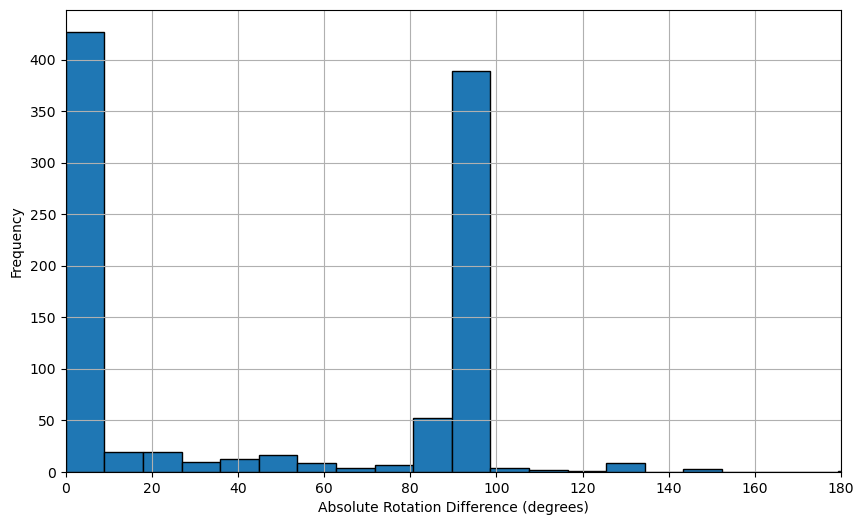

In [180]:
plt.figure(figsize=(10, 6))
plt.hist(nesting_pairs['Rotation_difference'], bins=30, edgecolor='black')
# plt.title('Distribution of Rotation Difference in Nesting Pairs')
plt.xlabel('Absolute Rotation Difference (degrees)')
plt.ylabel('Frequency')
plt.xlim(0, 180)
plt.grid(True)
plt.show()

## Segment overlap

In [165]:
num_rows_overlap_gt_0_6 = len(nesting_pairs[nesting_pairs['Sym_axis_overlap'] > 0.8])
num_rows_overlap_eq_0 = len(nesting_pairs[nesting_pairs['Sym_axis_overlap'] == 0.0])

print(f'Out of the {len(nesting_pairs)} nesting pairs, {num_rows_overlap_gt_0_6} ({(num_rows_overlap_gt_0_6 / len(nesting_pairs) * 100):.2f}%) had a symmetry axis overlap greater than 0.6 and {num_rows_overlap_eq_0} ({(num_rows_overlap_eq_0 / len(nesting_pairs) * 100):.2f}%) had a symmetry axis overlap of exactly 0.0')

Out of the 982 nesting pairs, 96 (9.78%) had a symmetry axis overlap greater than 0.6 and 392 (39.92%) had a symmetry axis overlap of exactly 0.0


### Graph

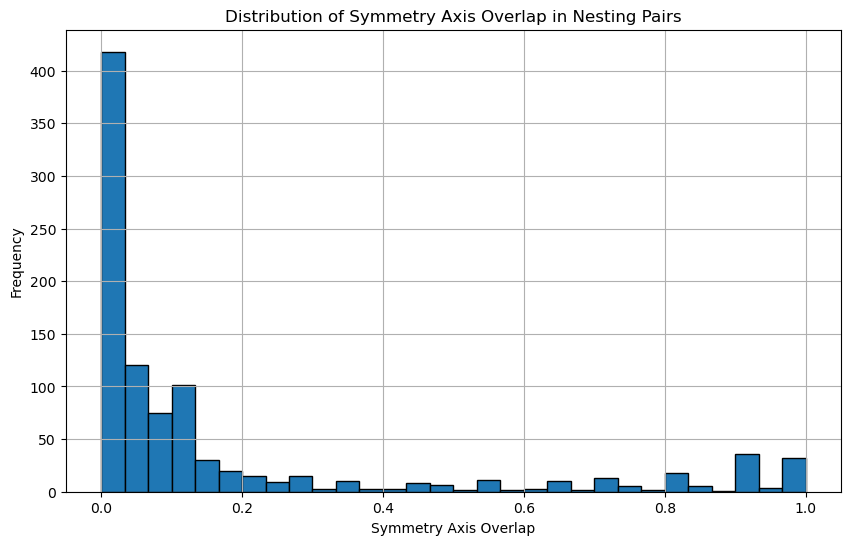

In [166]:
plt.figure(figsize=(10, 6))
plt.hist(nesting_pairs['Sym_axis_overlap'], bins=30, edgecolor='black')
plt.title('Distribution of Symmetry Axis Overlap in Nesting Pairs')
plt.xlabel('Symmetry Axis Overlap')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Convination rotation overlap.

In [167]:
rotation_diff_zero = rotation_diff_filtered_0[rotation_diff_filtered_0['Sym_axis_overlap'] == 0.0]

print(f'Out of the {len(rotation_diff_filtered_0)} nesting pairs with a rotation difference between 0 and {rot_diff_thres} degrees, {len(rotation_diff_zero)} ({(len(rotation_diff_zero) / len(rotation_diff_filtered_0) * 100):.2f}%) had a symmetry axis overlap of exactly 0.0')

Out of the 428 nesting pairs with a rotation difference between 0 and 10 degrees, 232 (54.21%) had a symmetry axis overlap of exactly 0.0


In [168]:
rot_diff_zero_90 = rotation_diff_filtered_90[rotation_diff_filtered_90['Sym_axis_overlap'] == 0.0]

print(f'Out of the {len(rotation_diff_filtered_90)} nesting pairs with a rotation difference between 80 and 100 degrees, {len(rot_diff_zero_90)} ({(len(rot_diff_zero_90) / len(rotation_diff_filtered_90) * 100):.2f}%) had a symmetry axis overlap of exactly 0.0')

Out of the 441 nesting pairs with a rotation difference between 80 and 100 degrees, 109 (24.72%) had a symmetry axis overlap of exactly 0.0


# Nestings relation to srt

## Correlation reaction time and nestings (image level)

In [169]:
pd.options.mode.chained_assignment = None  # default='warn'

new_df = participant_boxes[['id', 'file_name', 's_rt']]
new_df.rename(columns={'file_name': 'Image', 'id': 'Participant_id'}, inplace=True)

merged_df = pd.merge(participant_data, new_df, on=['Participant_id', 'Image'])
merged_df.head()

average_merged = merged_df.groupby('Image').mean().reset_index()
average_merged.drop(columns='Participant_id', inplace=True)

correlation_matrix_average = average_merged.drop(columns='Image').corr()
s_rt_correlation = correlation_matrix_average['s_rt']
print(s_rt_correlation)

Num_boxes          0.826906
Num_nestings       0.155811
Num_nestings_pc    0.142935
Num_nestings_cp    0.120313
s_rt               1.000000
Name: s_rt, dtype: float64


### Graph

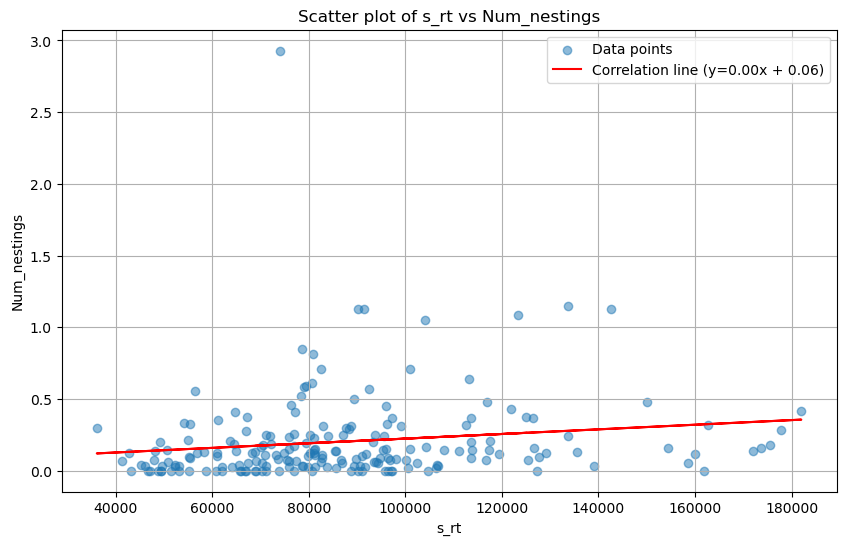

In [170]:
plt.figure(figsize=(10, 6))
plt.scatter(average_merged['s_rt'], average_merged['Num_nestings'], alpha=0.5, label='Data points')

# Calculate the correlation line
m, b = np.polyfit(average_merged['s_rt'], average_merged['Num_nestings'], 1)
plt.plot(average_merged['s_rt'], m * average_merged['s_rt'] + b, color='red', label=f'Correlation line (y={m:.2f}x + {b:.2f})')

plt.title('Scatter plot of s_rt vs Num_nestings')
plt.xlabel('s_rt')
plt.ylabel('Num_nestings')
plt.legend()
plt.grid(True)
plt.show()

## Correlation reaction time and nestings (box level)

In [171]:
correlation_matrix = merged_df.drop(columns='Image').corr()
s_rt_correlation = correlation_matrix['s_rt']
print(s_rt_correlation)

Participant_id     0.011846
Num_boxes          0.468384
Num_nestings       0.109577
Num_nestings_pc    0.094216
Num_nestings_cp    0.073860
s_rt               1.000000
Name: s_rt, dtype: float64


### Graph

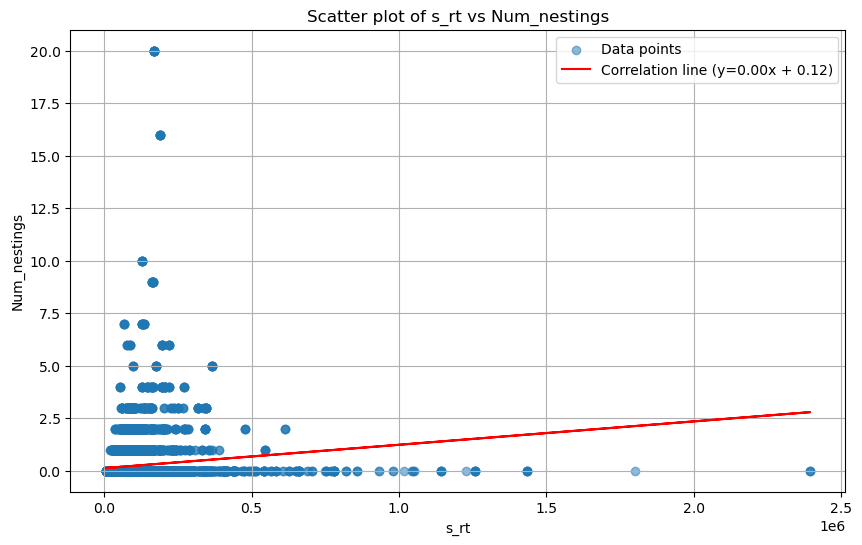

In [172]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['s_rt'], merged_df['Num_nestings'], alpha=0.5, label='Data points')

# Calculate the correlation line
m, b = np.polyfit(merged_df['s_rt'], merged_df['Num_nestings'], 1)
plt.plot(merged_df['s_rt'], m * merged_df['s_rt'] + b, color='red', label=f'Correlation line (y={m:.2f}x + {b:.2f})')

plt.title('Scatter plot of s_rt vs Num_nestings')
plt.xlabel('s_rt')
plt.ylabel('Num_nestings')
plt.legend()
plt.grid(True)
plt.show()

# Depth of Nesting

## Max Depth

In [173]:
depths_and_sizes = pd.read_csv('data_out/nesting/depths_and_sizes.csv')

non_one_depths = len(depths_and_sizes[depths_and_sizes['Depth'] != 1])

print(f'Out of the {len(depths_and_sizes)} nesting structures only {non_one_depths} ({(non_one_depths / len(depths_and_sizes) * 100):.2f}%) had a depth of 2.')

Out of the 1511 nesting structures only 2 (0.13%) had a depth of 2.


## Structure sizes

In [174]:
print(f"The average size of all nesting structures is {depths_and_sizes['Size'].mean():.2f} with a standard deviation of {depths_and_sizes['Size'].std():.2f}.")

The average size of all nesting structures is 2.43 with a standard deviation of 1.15.


## Graph of Structure sizes

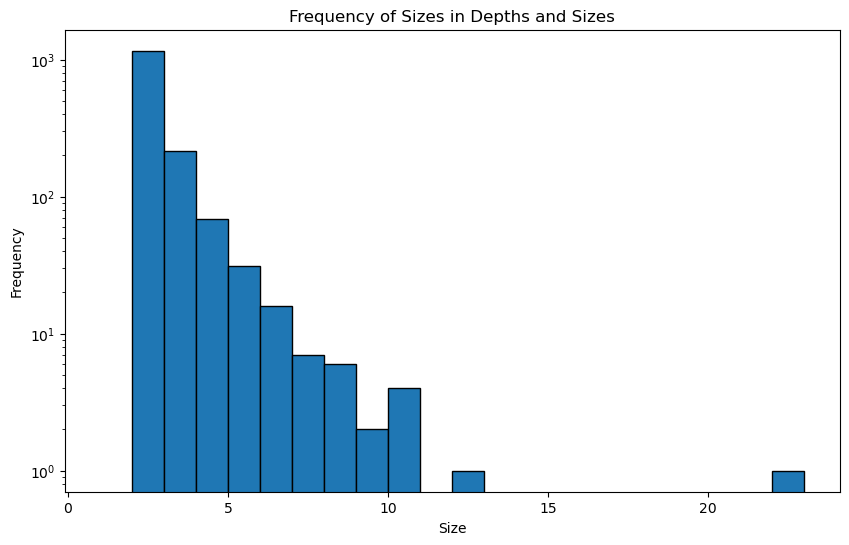

In [175]:
plt.figure(figsize=(10, 6))
plt.hist(depths_and_sizes['Size'], bins=range(1, depths_and_sizes['Size'].max() + 2), edgecolor='black')
plt.title('Frequency of Sizes in Depths and Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

# Images

## Images with a lot of nesting 

(Use Total)

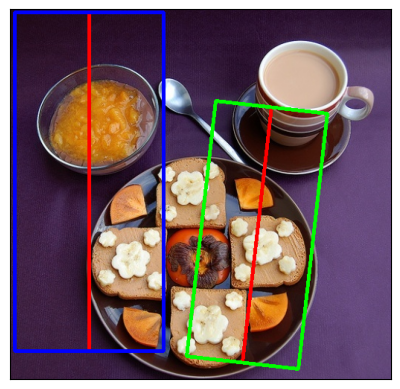

In [176]:
def drawNesting(img, nest_pair, participant_boxes, thickness=3):
    parent = participant_boxes.iloc[int(nest_pair['Parent'])]
    child = participant_boxes.iloc[int(nest_pair['Child'])]
    p2c = nesting_pair['Order']

    if p2c:
        display.drawBB(img, parent, thicknessAxis=thickness, thicknessRectangle=thickness, colorRectangle=(0, 255, 0))
        display.drawBB(img, child, thicknessAxis=thickness, thicknessRectangle=thickness, colorRectangle=(0, 0, 255))
    else:
        display.drawBB(img, parent, thicknessAxis=thickness, thicknessRectangle=thickness, colorRectangle=(0, 0, 255))
        display.drawBB(img, child, thicknessAxis=thickness, thicknessRectangle=thickness, colorRectangle=(0, 255, 0))


image_num = 2
nesting_num = 6

if True:
    nat_files = [f for f in os.listdir('images/images_nat') if os.path.isfile(os.path.join('images/images_nat', f))]

    natural_image_nesting_stats = image_nesting_stats[image_nesting_stats['Image'].isin(nat_files)]
    sorted_image_nesting_stats = natural_image_nesting_stats.sort_values(by='Total Nestings', ascending=False)

    image_file = sorted_image_nesting_stats.iloc[image_num]['Image']
    nesting_pairs_for_image = nesting_pairs[nesting_pairs['Image'] == image_file]
    nesting_pair = nesting_pairs_for_image.iloc[nesting_num]

    image = cv2.imread(display.getImgPath(image_file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    drawNesting(image, nesting_pair, participant_boxes)

    plt.yticks([])
    plt.xticks([])

    plt.imshow(image)


# Images with a lot of P-C or C-P nesting